## Main Task
**Netflix Content Strategy Analysis** we need data based on content titles, type (show or movie), genre, language, and release details (date, day of the week, season) to understand timing and content performance!  

**Content Strategy Analysis** means analyzing how content is created, released, distributed, and consumed to achieve specific goals, such as maximizing audience engagement, viewership, brand reach, or revenue!

### Data Understanding
The dataset consists of Netflix content released globally in 2023, containing information on the title, release date, language, content type (show or movie), availability status, and viewership hours.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dataset = pd.read_csv('datasets/netflix_content_2023.csv')

In [4]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [5]:
dataset.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
dataset.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

### Maximize Viewer Engagement
#### Which titles have the highest and lowest 'Hours Viewed'?

In [8]:
# Preprocessing the 'Hours Viewed' column
dataset['Hours Viewed'] = dataset['Hours Viewed'].replace(',', '', regex=True).astype(float)

In [9]:
dataset.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [10]:
# Sort the dataset by 'Hours Viewed' in ascending order
sorted_dataset = dataset.sort_values(by='Hours Viewed')

# Select the top 3 least viewed and top 3 most viewed titles
least_viewed = sorted_dataset.head(3)
most_viewed = sorted_dataset.tail(3)

In [11]:
print("Most Viewed Titles: ")
most_viewed.head()

Most Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show


In [12]:
print("Least Viewed Titles: ")
least_viewed.head()

Least Viewed Titles: 


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
24811,Zach Galifianakis: Live at the Purple Onion,No,NaN,100000.0,English,Movie
15898,Jay and Silent Bob Strike Back,No,NaN,100000.0,English,Movie
15897,Jay and Silent Bob Reboot,No,NaN,100000.0,English,Movie


#### How does 'Content Type' (e.g., movie, series) correlate with 'Hours Viewed'?

In [13]:
# Group by 'Content Type' and calculate the mean 'Hours Viewed'
content_type_grouped = dataset.groupby('Content Type')['Hours Viewed'].mean().reset_index()

# Sort the values for better visualization
content_type_grouped = content_type_grouped.sort_values(by='Hours Viewed', ascending=False)

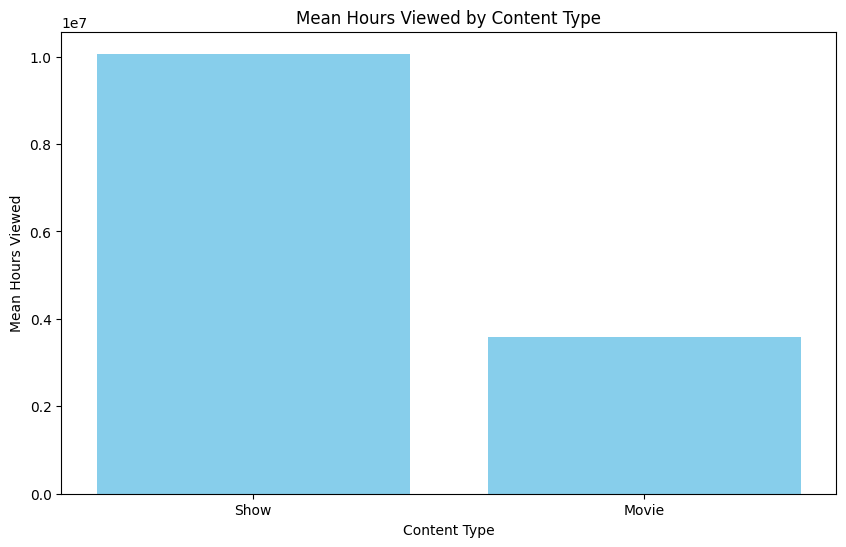

In [14]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(content_type_grouped['Content Type'], content_type_grouped['Hours Viewed'], color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Content Type')
plt.show()

> The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies.  
This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall!  

#### What are the trends in 'Hours Viewed' across different 'Release Dates'?

In [17]:
# Convert 'Release Date' from string to datetime format
dataset['Release Date'] = pd.to_datetime(dataset['Release Date'])
# Extract year from 'Release Date'
dataset['Release Year'] = dataset['Release Date'].dt.year

In [19]:
# Group by 'Release Year' and calculate the mean 'Hours Viewed'
yearly_trends = dataset.groupby('Release Year')['Hours Viewed'].mean().reset_index()

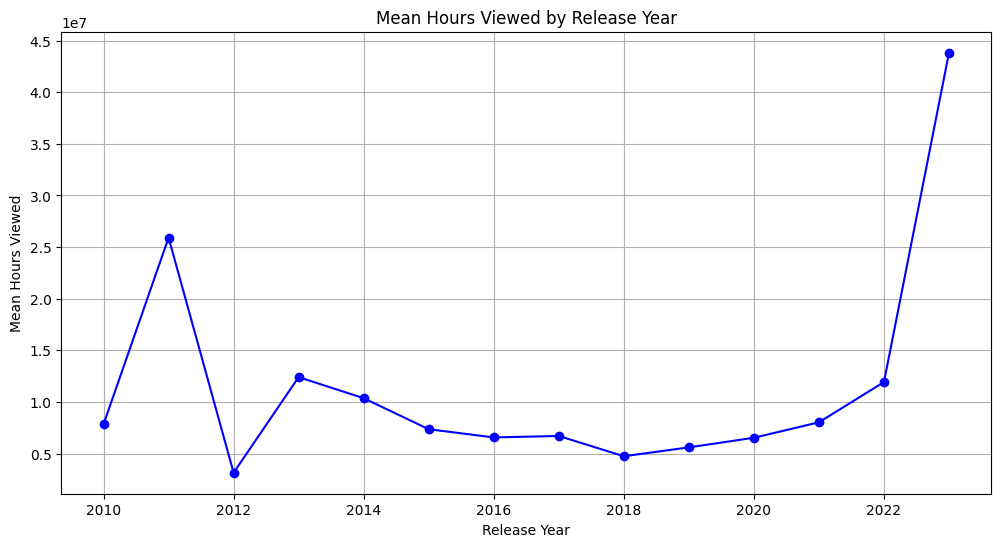

In [20]:
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['Release Year'], yearly_trends['Hours Viewed'], marker='o', linestyle='-', color='blue')
plt.xlabel('Release Year')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Release Year')
plt.grid(True)
plt.show()

> There is an early surge from 2010 to 2011, which likely indicates the release of highly engaging content that captivated audiences. This is followed by a significant drop in 2012, possibly due to less engaging content or external factors impacting viewership. From 2013 to 2022, we observe a period of recovery and stabilization, suggesting the establishment of a steady audience and consistent quality content. Finally, 2023 stands out with a remarkable spike, which could be attributed to a breakout hit, changes in distribution strategies, or broader trends like increased screen time!  

#### Does the 'Language Indicator' affect the 'Hours Viewed' significantly?

In [21]:
# Group by 'Language Indicator' and calculate the mean 'Hours Viewed'
language_grouped = dataset.groupby('Language Indicator')['Hours Viewed'].mean().reset_index()
# Sort the values for better visualization
language_grouped = language_grouped.sort_values(by='Hours Viewed', ascending=False)

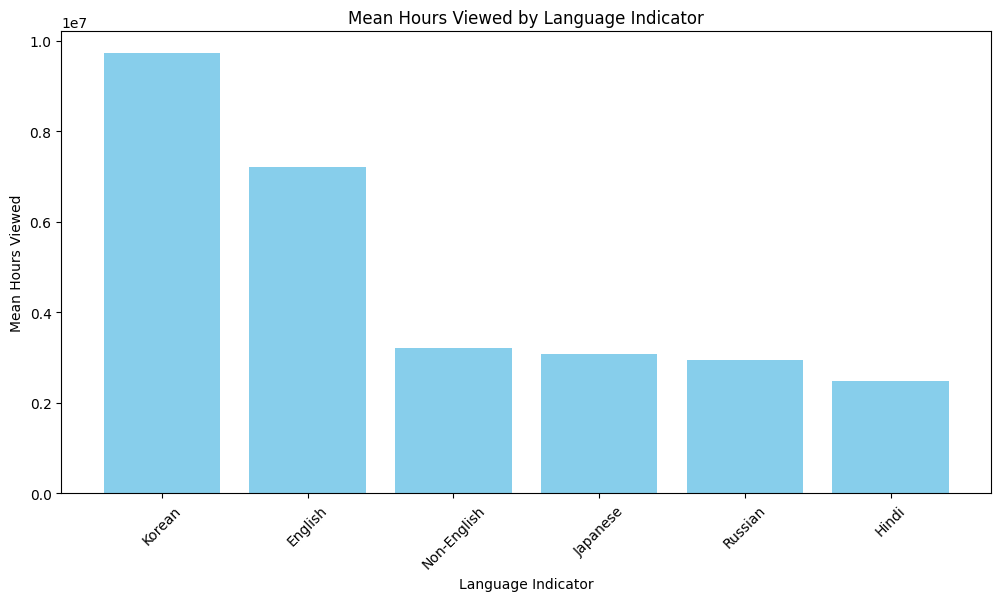

In [22]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(language_grouped['Language Indicator'], language_grouped['Hours Viewed'], color='skyblue')
plt.xlabel('Language Indicator')
plt.ylabel('Mean Hours Viewed')
plt.title('Mean Hours Viewed by Language Indicator')
plt.xticks(rotation=45)
plt.show()

> The analysis shows a clear preference for Korean content, with the highest average 'Hours Viewed'. English content follows closely. This trend highlights the significant engagement levels for Korean and English content compared to other languages. Non-English, Japanese, and Russian content have similar viewership, indicating moderate engagement, while Hindi content has slightly lower engagement.

##### Performing ANOVA test
**ANOVA (Analysis of Variance)**: ANOVA is a statistical test used to compare the means of three or more groups to see if there are significant differences among them. It helps to determine if the observed differences in sample data are due to actual differences in the population or just due to random chance!   
We used ANOVA to determine if the 'Language Indicator' significantly affects 'Hours Viewed' by comparing the average 'Hours Viewed' across different language groups!  
**F-statistic**: The F-statistic is a value calculated during ANOVA that compares the variation between group means to the variation within the groups. A higher F-statistic value suggests that the group means are significantly different from each other!  

Hypotheses:  

**Null Hypothesis (H0)**: There is no significant difference in the mean 'Hours Viewed' among different language groups. In other words, the language of the content does not affect viewership.  
**Alternative Hypothesis (H1)**: There is a significant difference in the mean 'Hours Viewed' among different language groups. In other words, the language of the content does affect viewership.  


In [ ]:
# Perform ANOVA test
anova_result = stats.f_oneway(*[dataset[dataset['Language Indicator'] == lang]['Hours Viewed'] for lang in dataset['Language Indicator'].unique()])

print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

ANOVA F-statistic: 43.96747954216327
ANOVA p-value: 2.578724948282694e-45


> With an F-statistic of 43.97 and a p-value of approximately 2.58*10^{-45}, the p-value is significantly less than 0.05. This indicates that there are statistically significant differences in 'Hours Viewed' across different 'Language Indicator' groups.  
In other words, the language of the content does have a significant effect on viewership